# Worksheet 15

Name:  Min Han  
UID: U15822408

### Topics

- Logistic Regression

## Logistic Regression

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

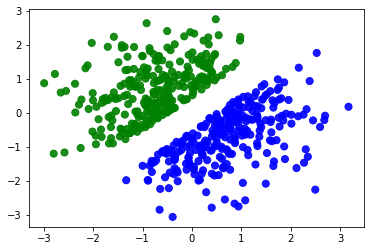

In [48]:
X, Y = generate_line_data()
cs = np.array([x for x in 'gb'])
dig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.9)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [26]:
model = LogisticRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[ 4.11337993 -4.10105513]]
[0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

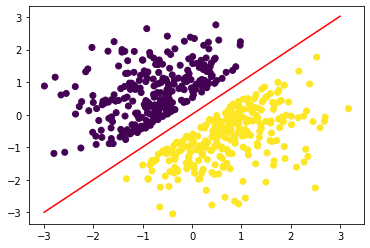

In [30]:
# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xd = np.linspace(-3, 3, 100)
yd = m*xd + c
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot(xd, yd, 'r')
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

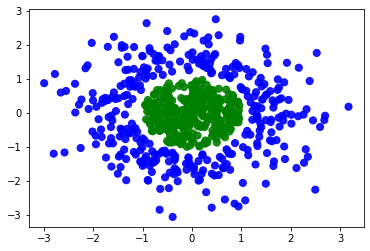

In [31]:
X, Y = generate_circle_data()
cs = np.array([x for x in 'gb'])
dig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.9)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [13]:
poly = PolynomialFeatures(2)
lr = LogisticRegression()
model = make_pipeline(poly, lr)
model.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

f) Plot the decision boundary using the code below.

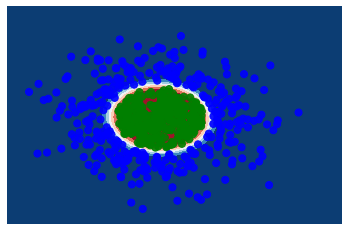

In [14]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

In [23]:
%matplotlib widget # Requires: pip3 install ipympl

from mpl_toolkits.mplot3d import Axes3D

#ax = plt.axes(projection='3d')
fid = plt.figure()

ax.scatter3D(X[:,0], X[:,1], X3[:,0])
plt.show()

UsageError: unrecognized arguments: # Requires: pip3 install ipympl


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


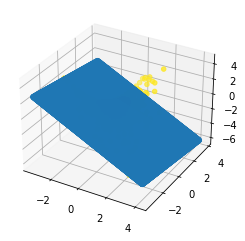

In [34]:
import pandas as pd
X_new = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

meshData_df = pd.DataFrame(meshData, columns=['X1', 'X2'])
meshData_df['X3'] = meshData_df.apply(lambda x: (lr.intercept_[0] - lr.coef_[0][0]*x['X1'] - lr.coef_[0][1]*x['X2'])/lr.coef_[0][2], axis=1)

ax = plt.axes(projection='3d')
ax.scatter3D(meshData_df['X1'], meshData_df['X2'], meshData_df['X3'])
ax.scatter3D(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=Y)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

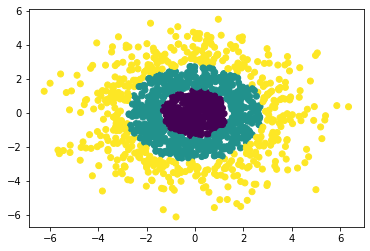

In [45]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

df_X = pd.DataFrame(X, columns=['X1', 'X2'])
pf = PolynomialFeatures(degree = 2, include_bias=False).fit(df_X)
X_new = pf.transform(df_X)
cols = pf.get_feature_names_out(df_X.columns)
X_new = pd.DataFrame(X_new, columns=cols)
X_new = X_new[['X1^2', 'X2^2']]
X_new = X_new.to_numpy()
model = LogisticRegression(verbose=2).fit(X_new, Y)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

meshData = pd.DataFrame(meshData, columns=['X1', 'X2'])
pf = PolynomialFeatures(degree = 2, include_bias=False).fit(meshData)
X_new = pf.transform(meshData)
cols = pf.get_feature_names_out(meshData.columns)
X_new = pd.DataFrame(X_new, columns=cols)
X_new = X_new[['X1^2', 'X2^2']]
meshData = X_new.to_numpy()

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap=plt.cm.hot, vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()